In [1]:
from utils import fetch
from Classifier import RBM_LR, PCA_LR
from Vectorizer import Vectorizer

In [2]:
def hyperparameter_tuning(Clf, X_train, y_train, **params):
    # Search best params
    print(
        Clf.grid_search(
            X_train,
            y_train,
            **params
        )
    )

In [23]:
def build_model(Vctr, Clf, X_train, X_test, y_train, y_test):
    # Transform data
    X_train = Vctr.model.fit_transform(X_train)
    X_test = Vctr.model.fit_transform(X_test)

    # Fit & predict data
    Clf.model.fit(X_train, y_train)
    y_pred = Clf.model.predict(X_test)

    # Make classification report
    Clf.report(X_test, y_test)
    Clf.plot_heatmap(X_test, y_test, y_pred)
    Clf.plot_digits(
        X_test, labels=y_test, ticks=(3, 10), labels_pred=y_pred
    )

    # Save models
    Vctr.joblib()
    Clf.joblib()

In [3]:
X_train, X_test, y_train, y_test = fetch(10000, random_state=0)
Vctr = Vectorizer()
rbm_lr = RBM_LR(random_state=0)
pca_lr = PCA_LR(random_state=0)

In [ ]:
hyperparameter_tuning(
    rbm_lr,
    X_train, y_train,
    bernoullirbm__learning_rate=[0.1, 0.01, 0.001],
    bernoullirbm__n_iter = [20, 40, 80],
    logisticregression__C=[1, 100, 10000],
    logisticregression__max_iter=[250, 500, 1000],
)

Classification report for classifier Pipeline(memory=None,
         steps=[('bernoullirbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.01,
                              n_components=256, n_iter=10, random_state=0,
                              verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       192
           1       0.97      0.99      0.98       215
      

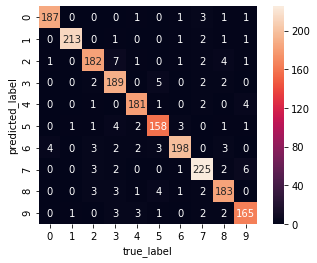

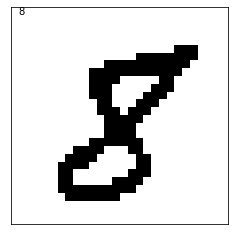

Pickled classifier at models/DigitClassifier.joblib


In [22]:
build_model(
    Vctr, rbm_lr,
    X_train, X_test,
    y_train, y_test
)